In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
#find col names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-100.,    0.,  100.,  200.,  300.,  400.]),
 [Text(-100.0, 0, '2016-12-01'),
  Text(0.0, 0, '2017-08-23'),
  Text(100.0, 0, '2017-05-15'),
  Text(200.0, 0, '2017-02-04'),
  Text(300.0, 0, '2016-10-27'),
  Text(400.0, 0, '')])

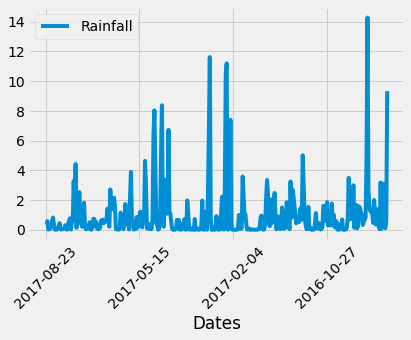

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
sel = [Measurement.date,
        func.sum(Measurement.prcp)]
last_year = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).all()
last_year
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year)
df = df.rename(columns = {0:'Dates',1:'Rainfall'})
df = df.set_index('Dates')
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot() 
plt.xticks(rotation = '45')


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Rainfall
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [14]:
#find col names
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to show how many stations are available in this dataset?
sel = [Station.station,
      Station.id]
station_count = session.query(*sel).\
    group_by(Station.id).all()
station_count

[('USC00519397', 1),
 ('USC00513117', 2),
 ('USC00514830', 3),
 ('USC00517948', 4),
 ('USC00518838', 5),
 ('USC00519523', 6),
 ('USC00519281', 7),
 ('USC00511918', 8),
 ('USC00516128', 9)]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Station.station, func.sum(Measurement.date)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.sum(Measurement.date).desc()).all()

[('USC00519281', 5580931.0),
 ('USC00519397', 5484481.0),
 ('USC00513117', 5454047.0),
 ('USC00519523', 5373411.0),
 ('USC00516128', 5258794.0),
 ('USC00514830', 4433540.0),
 ('USC00511918', 3982323.0),
 ('USC00517948', 2762432.0),
 ('USC00518838', 1027685.0)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature 
sel = [Measurement.station, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

Text(0, 0.5, 'observations')

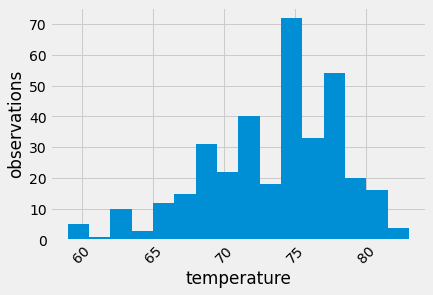

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogra
last_year_most_active = session.query(Measurement.date,
                         Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > '2016-08-18').\
    order_by(Measurement.date.desc()).all()
last_year_most_active
df = pd.DataFrame(last_year_most_active)

plt.hist(df[[1]], bins = 16)
plt.xticks(rotation = '45')
plt.xlabel('temperature')
plt.ylabel('observations')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
